##PCA and data visualization

to perform dimensionality reduction using PCA and create appropriate plots to analyze components.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [ ]:
#load data set
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
X=iris.data
y=iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.shape

(150, 4)

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0


In [ ]:
#feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

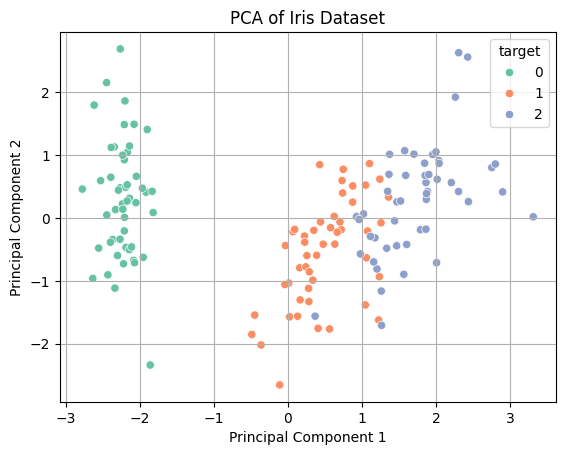

In [ ]:
#convert to dataframe for plotting
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

#plot principal components
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='target', palette='Set2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.grid(True)
plt.show()

In [ ]:
#variance captured
explained_variance = pca.explained_variance_ratio_
print("Variance captured by each principal component:", explained_variance)

Variance captured by each principal component: [0.72962445 0.22850762]


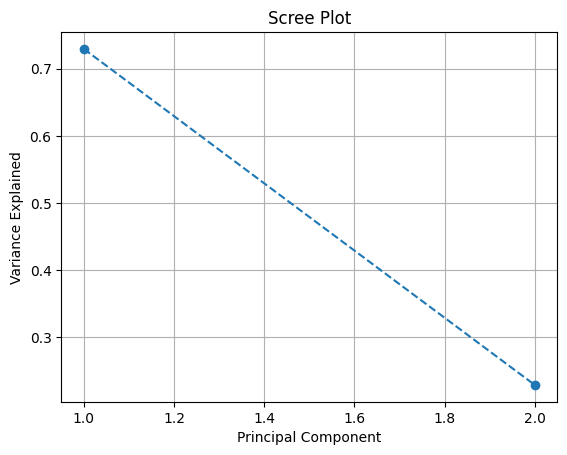

In [ ]:
#scree plot
plt.figure()

plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o',linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.grid(True)
plt.show()